In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from textblob import TextBlob

In [206]:
import re #regular expression
import time,string,warnings

In [207]:
!pip install nltk



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [208]:
#NLP related libraries
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords #Stopwords dont add any context to the analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [210]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/gm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [211]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [212]:
nltk.download('wordnet')#This is used for words which have synonyms and antonyms. Helps in sentiment analysis
nltk.download('vader_lexicon')# tool used to analyse sentiment in social media platforms


[nltk_data] Downloading package wordnet to /home/gm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /home/gm/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [213]:
#Loading Data
tweets=pd.read_csv('/home/gm/Desktop/Code/ExcelR-Assignments/text mining/Elon_musk.csv',encoding='Latin-1')

In [214]:
tweets.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 Im an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [215]:
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)#We dont want the unnamed on the title
tweets.rename({'Text':'Tweets'},axis=1,inplace=True)


In [216]:
tweets

Tweets
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [217]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


### Data Exploration

#### Number of Words and Characters

In [218]:
tweets['word_count'] = tweets['Tweets'].apply(lambda x: len(str(x).split(" ")))
tweets[['Tweets','word_count']].head()


Tweets  word_count
0                             @kunalb11 Im an alien           4
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...          13
2                @joerogan @Spotify Great interview!           4
3                    @gtera27 Doge is underestimated           4
4  @teslacn Congratulations Tesla China for amazi...          17

In [219]:
#Char count
tweets['char_count'] = tweets['Tweets'].str.len() # this includes spaces
tweets[['Tweets','char_count']].head()


Tweets  char_count
0                             @kunalb11 Im an alien          22
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...          82
2                @joerogan @Spotify Great interview!          35
3                    @gtera27 Doge is underestimated          31
4  @teslacn Congratulations Tesla China for amazi...         104

In [220]:
#number of stopwords
stop = stopwords.words('english')

tweets['stopwords'] = tweets['Tweets'].apply(lambda x: len([x for x in x.split() if x in stop]))
tweets[['Tweets','stopwords']].head()


Tweets  stopwords
0                             @kunalb11 Im an alien          1
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...          4
2                @joerogan @Spotify Great interview!          0
3                    @gtera27 Doge is underestimated          1
4  @teslacn Congratulations Tesla China for amazi...          5

In [221]:
#top 20 rarest words in his whole history of tweets
rare=pd.Series(' '.join(tweets['Tweets']).split()).value_counts()[-20:]
rare

https://t.co/mWOpR7W8kk    1
Fwiw,                      1
genes)                     1
Strange                    1
https://t.co/x57OdvDAuO    1
gene,                      1
search                     1
lab.                       1
reliable.                  1
protein.                   1
N3                         1
lab                        1
(N1                        1
detection                  1
Lab                        1
https://t.co/K77wXQ11yt    1
dicey                      1
accurate,                  1
thinks                     1
28                         1
Name: count, dtype: int64

In [222]:
percentage_with_hyperlink = tweets.Tweets.str.contains('https://').mean() * 100
print(f"{percentage_with_hyperlink:.2f}% of his tweets have a hyperlink")


32.17% of his tweets have a hyperlink


In [223]:
tagged_users=tweets.Tweets.str.contains('@').mean()*100
print(f"{tagged_users:.2f}% of the time he tagged someone")

83.94% of the time he tagged someone


In [224]:
tweets['Tweets'][:10]
#we can see some text errors in the tweets such as random block at i'm 

0                               @kunalb11 Im an alien
1    @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                  @joerogan @Spotify Great interview!
3                      @gtera27 Doge is underestimated
4    @teslacn Congratulations Tesla China for amazi...
5    Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6    Frodo was the underdoge,\nAll thought he would...
7       @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8    @flcnhvy @anonyx10 Indeed! Tweets definitely d...
9     The most entertaining outcome is the most likely
Name: Tweets, dtype: object

In [225]:
#We can correct the spelling of the tweets and make 
#words more readable but the caveat is that this might correct the slangs and some informal words which are present in Twitter


In [226]:
# Word Tockenizer
nltk.download('punkt')
from nltk import word_tokenize
tokens=tweets.Tweets.map(word_tokenize)


[nltk_data] Downloading package punkt to /home/gm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [227]:
tokens

0                           [@, kunalb11, Im, an, alien]
1       [@, ID_AA_Carmack, Ray, tracing, on, Cyberpunk...
2          [@, joerogan, @, Spotify, Great, interview, !]
3                  [@, gtera27, Doge, is, underestimated]
4       [@, teslacn, Congratulations, Tesla, China, fo...
                              ...                        
1994    [@, flcnhvy, True, ,, it, sounds, so, surreal,...
1995    [@, PPathole, Make, sure, to, read, ur, terms,...
1996         [@, TeslaGong, @, PPathole, Samwise, Gamgee]
1997    [@, PPathole, Altho, Dumb, and, Dumber, is, <,...
1998                       [Progress, update, August, 28]
Name: Tweets, Length: 1999, dtype: object

In [228]:
tweets.loc[0]
#We dont need to manually calculate the info now

Tweets        @kunalb11 Im an alien
word_count                         4
char_count                        22
stopwords                          1
Name: 0, dtype: object

In [229]:
def contains(x):
    lower=x.lower()
    title=x.title()
    upper=x.upper()
    return tweets.loc[tokens.map(lambda a: lower in a or title in a or upper in a).values]

In [230]:
contains('tesla')
#These are all the tweets which have tesla in them

Tweets  word_count  \
4     @teslacn Congratulations Tesla China for amazi...          17   
30    @CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer ...           5   
32    @SRuhle Everyone at Tesla receives stock. \n\n...          23   
56         Time to tell the story of Tesla &amp; SpaceX           9   
126   @Carnage4Life I sure hope thats not true at T...          11   
...                                                 ...         ...   
1979  @mjkapkan @EvaFoxU @Tesla Probably a good one ...          13   
1980                @blue_bnd @EvaFoxU @Tesla Even more           5   
1981                    @Techgnostik @EvaFoxU @Tesla Ok           4   
1982             @scr00chy @EvaFoxU @Tesla <U+0001F440>           4   
1983  @EvaFoxU @Tesla Berlin Model Y is the one to w...          19   

      char_count  stopwords  
4            104          5  
30            70          0  
32           138          9  
56            44          3  
126           61          3  
...          ...        ...  
1979          81          3  
1980          35          1  
1981          31          0  
1982          38          0  
1983         114          6  

[156 rows x 4 columns]

In [231]:
contains('tesla').Tweets.values.tolist()
#By looking at this we observe that we need to remove a lot of stuff from the text to make it clean

['@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 '@CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer <U+0001F923><U+0001F923>',
 '@SRuhle Everyone at Tesla receives stock. \n\nMy comp is all stock/options, which I do not take off the table. \n\nThat\x92s what you\x92re missing.',
 'Time to tell the story of Tesla &amp; SpaceX',
 '@Carnage4Life I sure hope that\x92s not true at Tesla or SpaceX!',
 '@WholeMarsBlog Tesla is steadily moving all NNs to 8 camera surround video. This will enable superhuman self-driving.',
 '@cleantechnica To my surprise, Tesla has better AI hardware &amp; software than Waymo (money)',
 '@ElonsWorld @Tesla @SpaceX @neuralink @boringcompany @EashanMisra That would probably mean civilization is doing gr\x85 https://t.co/sIAr8iFvWc',
 '@TesLatino @Tesla Absolutely! They rock. <U+0001F5A4>',
 '@RationalEtienne @OwenSparks_ @Tesla With our giant casting machines, we are literally trying to make full-size car\x

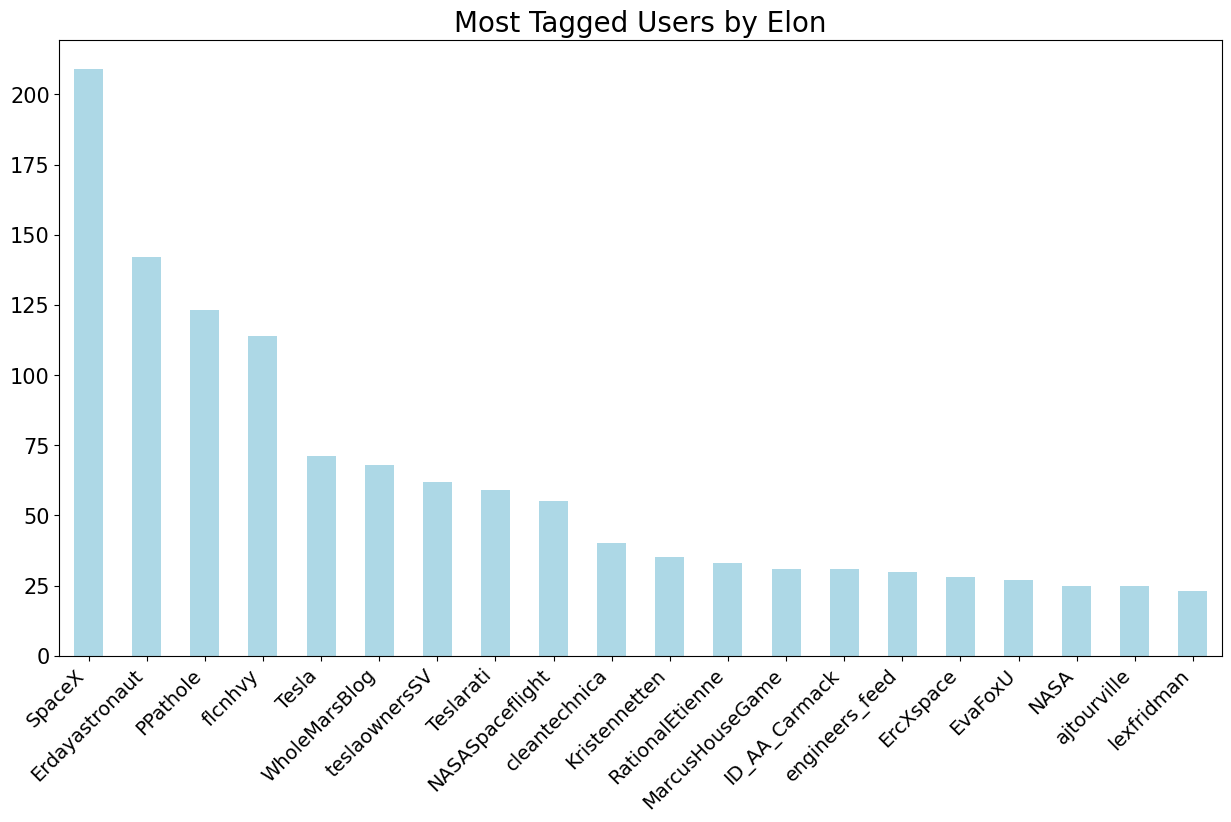

In [232]:
## Visualization of the most Users he tagged


import itertools

viz = list(itertools.chain(*tweets.Tweets.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") if '@' in handle.replace(":", "")]).tolist()))

pd.Series(viz).value_counts().head(20).plot.bar(
    figsize=(15, 8), fontsize=15, color='lightblue'
)
plt.gca().set_title('Most Tagged Users by Elon', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=14);

### Text Cleaning and Preprocessing

In [233]:
tweets_1=[Text.strip() for Text in tweets.Tweets]#Removing unwanted blanks
tweets_1=[Text for Text in tweets_1 if Text] #remove empty strings(extra step)
tweets_text=' '.join(tweets_1)#Making it a wall of text

In [234]:
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [235]:
#Removing All @Username and tockenizes the text
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [236]:
# Removing Punctuations\urls(with http/s)
tweets_tokens_text=' '.join(tweets_tokens)
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_url_text=re.sub(r'http\S+', '', no_punc_text)
text_tokens=word_tokenize(no_url_text)

In [237]:
text_tokens

['I',
 '\x92',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'Great',
 'interview',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'It',
 '\x92',
 's',
 'getting',
 'real',
 'Bought',
 'some',
 'Dogecoin',
 'for',
 'lil',
 'X',
 'so',
 'he',
 'can',
 'be',
 'a',
 'toddler',
 'hodler',
 'He',
 'definitel

In [238]:
#Removing Stopwords
stop=stopwords.words('english')
no_stop_tokens=[word for word in text_tokens if not word in stop]
print(no_stop_tokens)


['I', '\x92', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', '\x92', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'U0001F923', 'U0001F923', 'This', 'true', 'power', 'haha', 'Any', 'crypto', 'wallet', '\x92', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway'

In [239]:
# as we are seeing \x92 we can just remove it,Make them all Lower Case
custom_stop=['\x92']
stop.extend(custom_stop)

no_stop_tokens=[word for word in text_tokens if not word in stop]
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words)



['i', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'sent', 'just', 'agree', 'clubhouse', 'it', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'this', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mi

In [240]:
!pip install spacy
!python -m spacy download en_core_web_sm




[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 864.3 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [241]:
#Stemming and Lemmantization using NLTK and Spacy Libraries
import spacy
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]

nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['I', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'this', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'once', 'predi

In [242]:
#Convert it back to wall of text instead of tokenize for word Cloud
clean_tweets=' '.join(lemmas)
print(clean_tweets)

I alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account u0001f923 u0001f923 this true power haha any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea appl

#### Word Cloud

In [243]:
!pip install WordCloud


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [244]:
from wordcloud import WordCloud

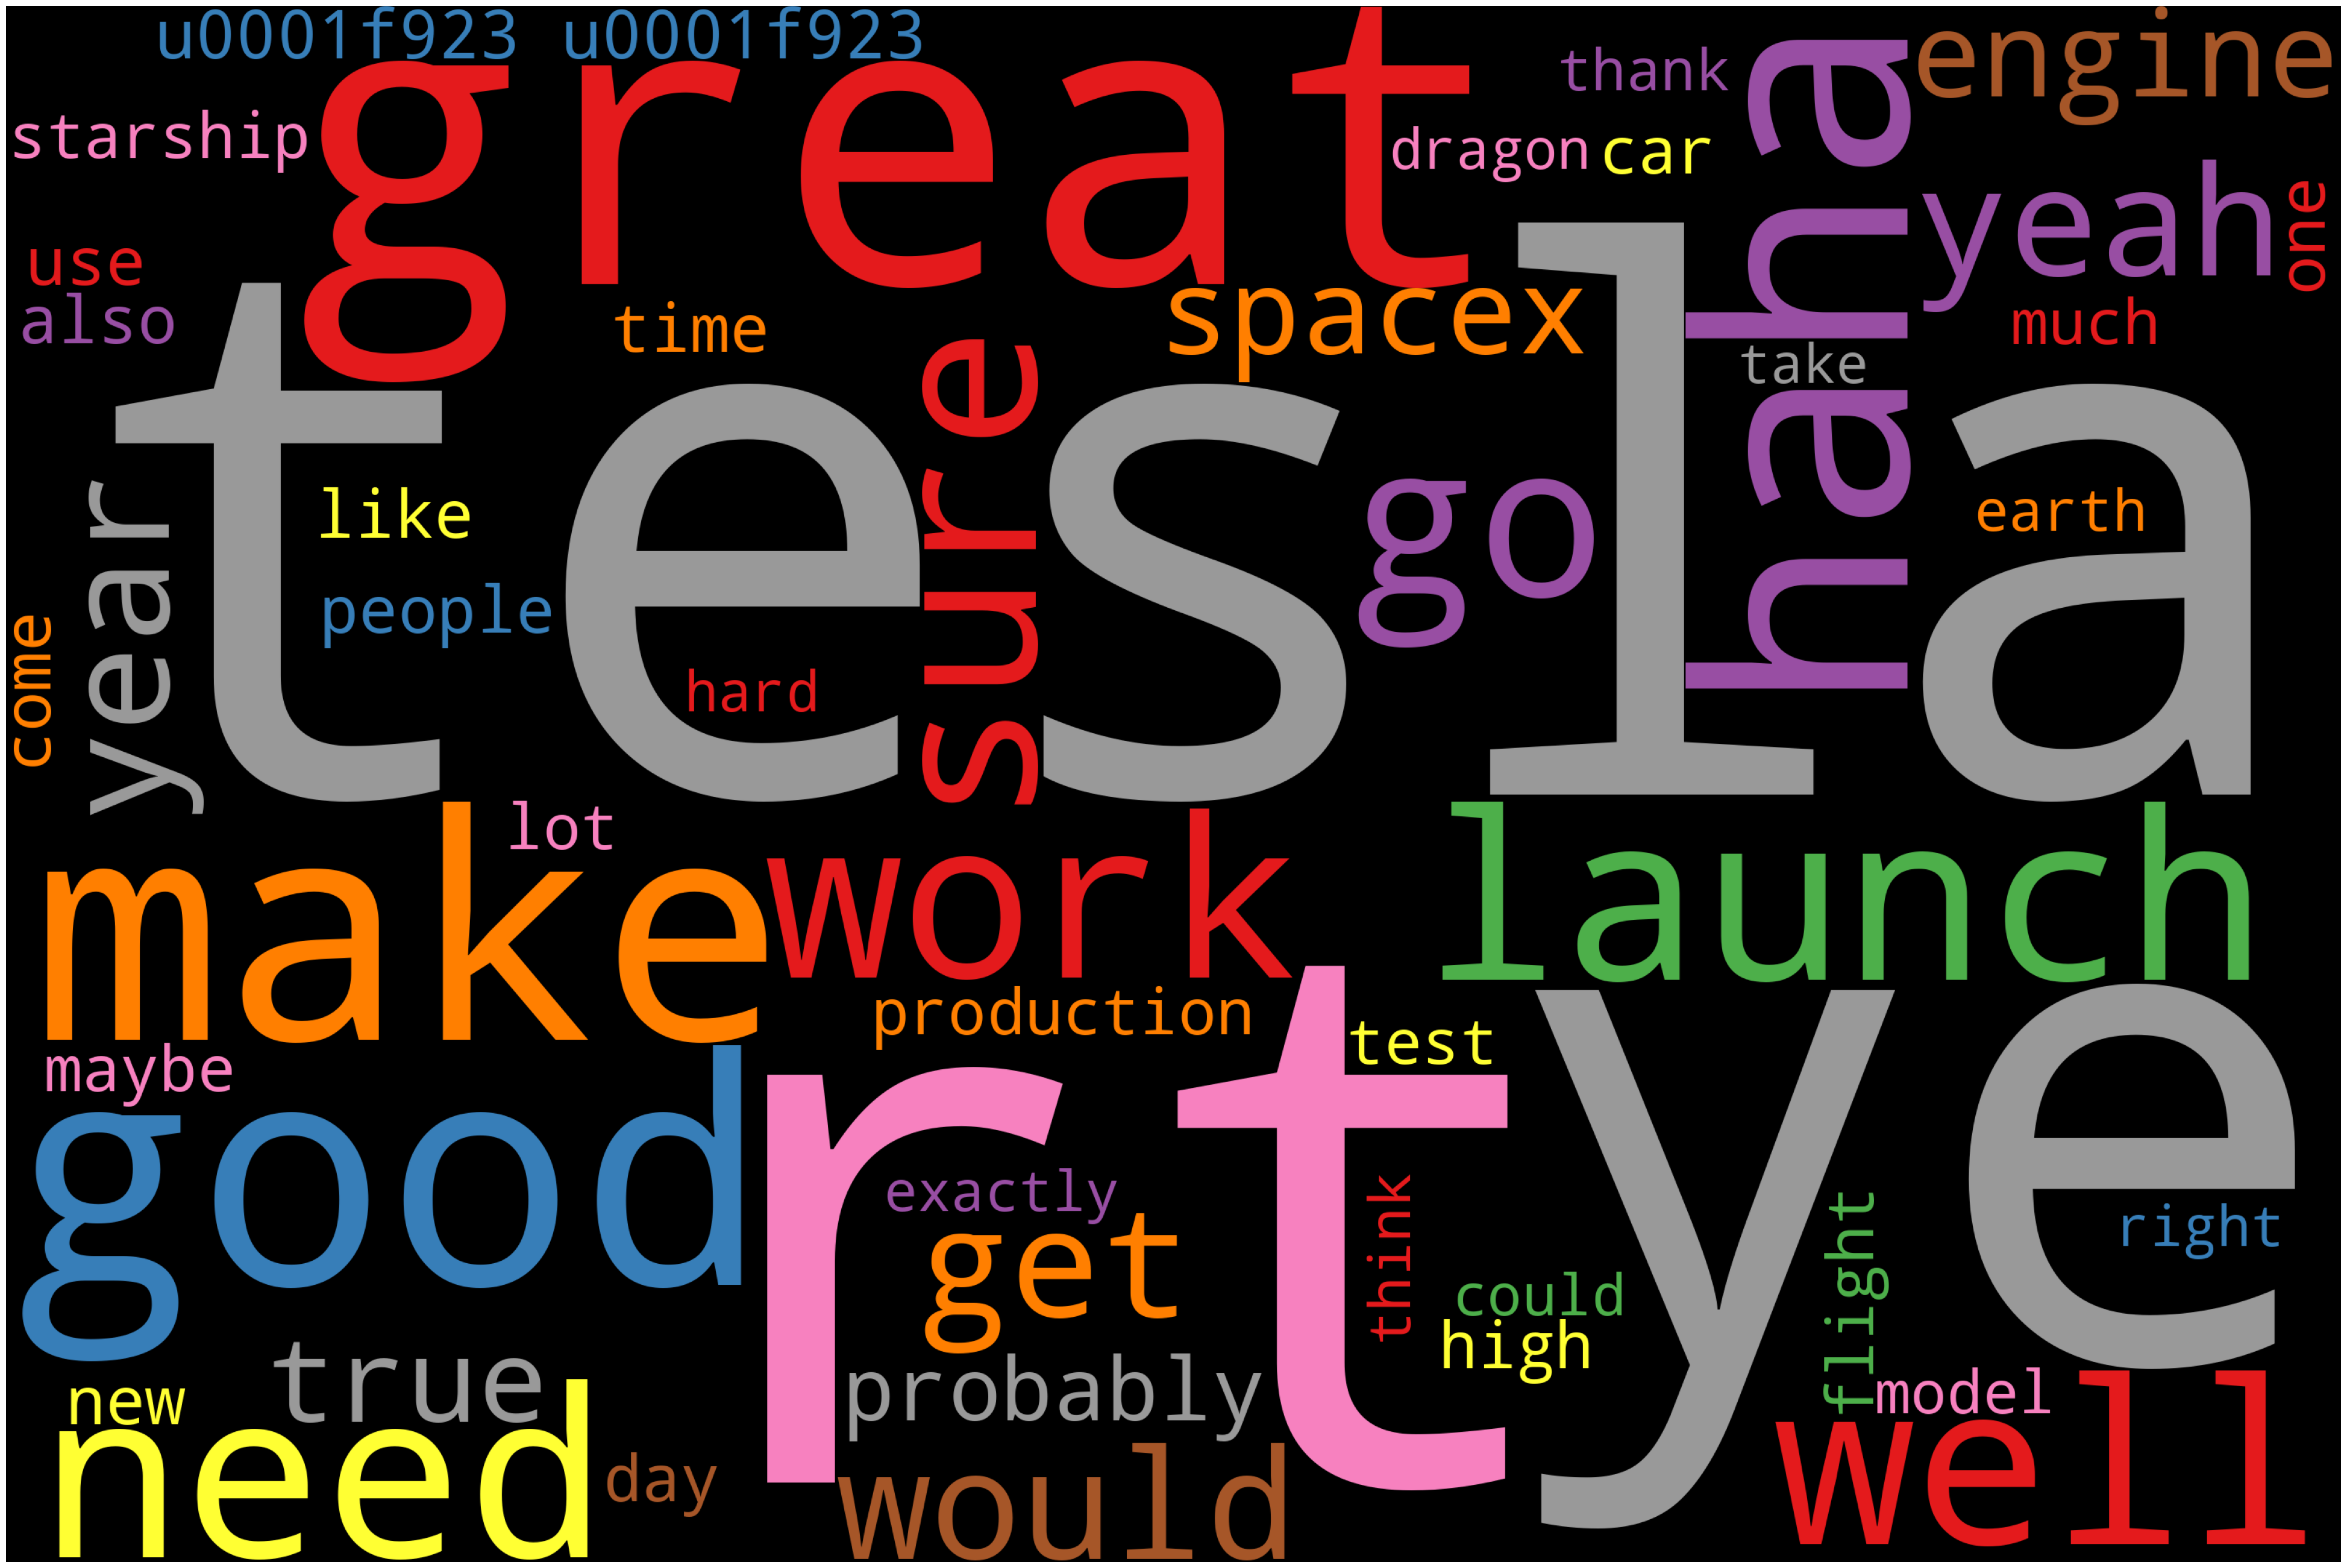

In [245]:
#We can see a lot of unwanted text in cloud which are considered Slangs
#We can remove this by again adding custom words to our list of stopwords

def plot_cloud(wordcloud):
    plt.figure(figsize=(50,40))
    plt.imshow(wordcloud)
    plt.axis('off')   
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=stop).generate(clean_tweets)
plot_cloud(wordcloud)

In [246]:
custom_stop=['\x92','ye','u0001f923','haha','rt','yes']
stop.extend(custom_stop)
no_stop_tokens=[word for word in text_tokens if not word in stop]
lower_words=[Text.lower() for Text in no_stop_tokens]

#Stemming and Lemmantization using NLTK and Spacy Libraries
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]

nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
lemmas=[token.lemma_ for token in doc]
clean_tweets=' '.join(lemmas)


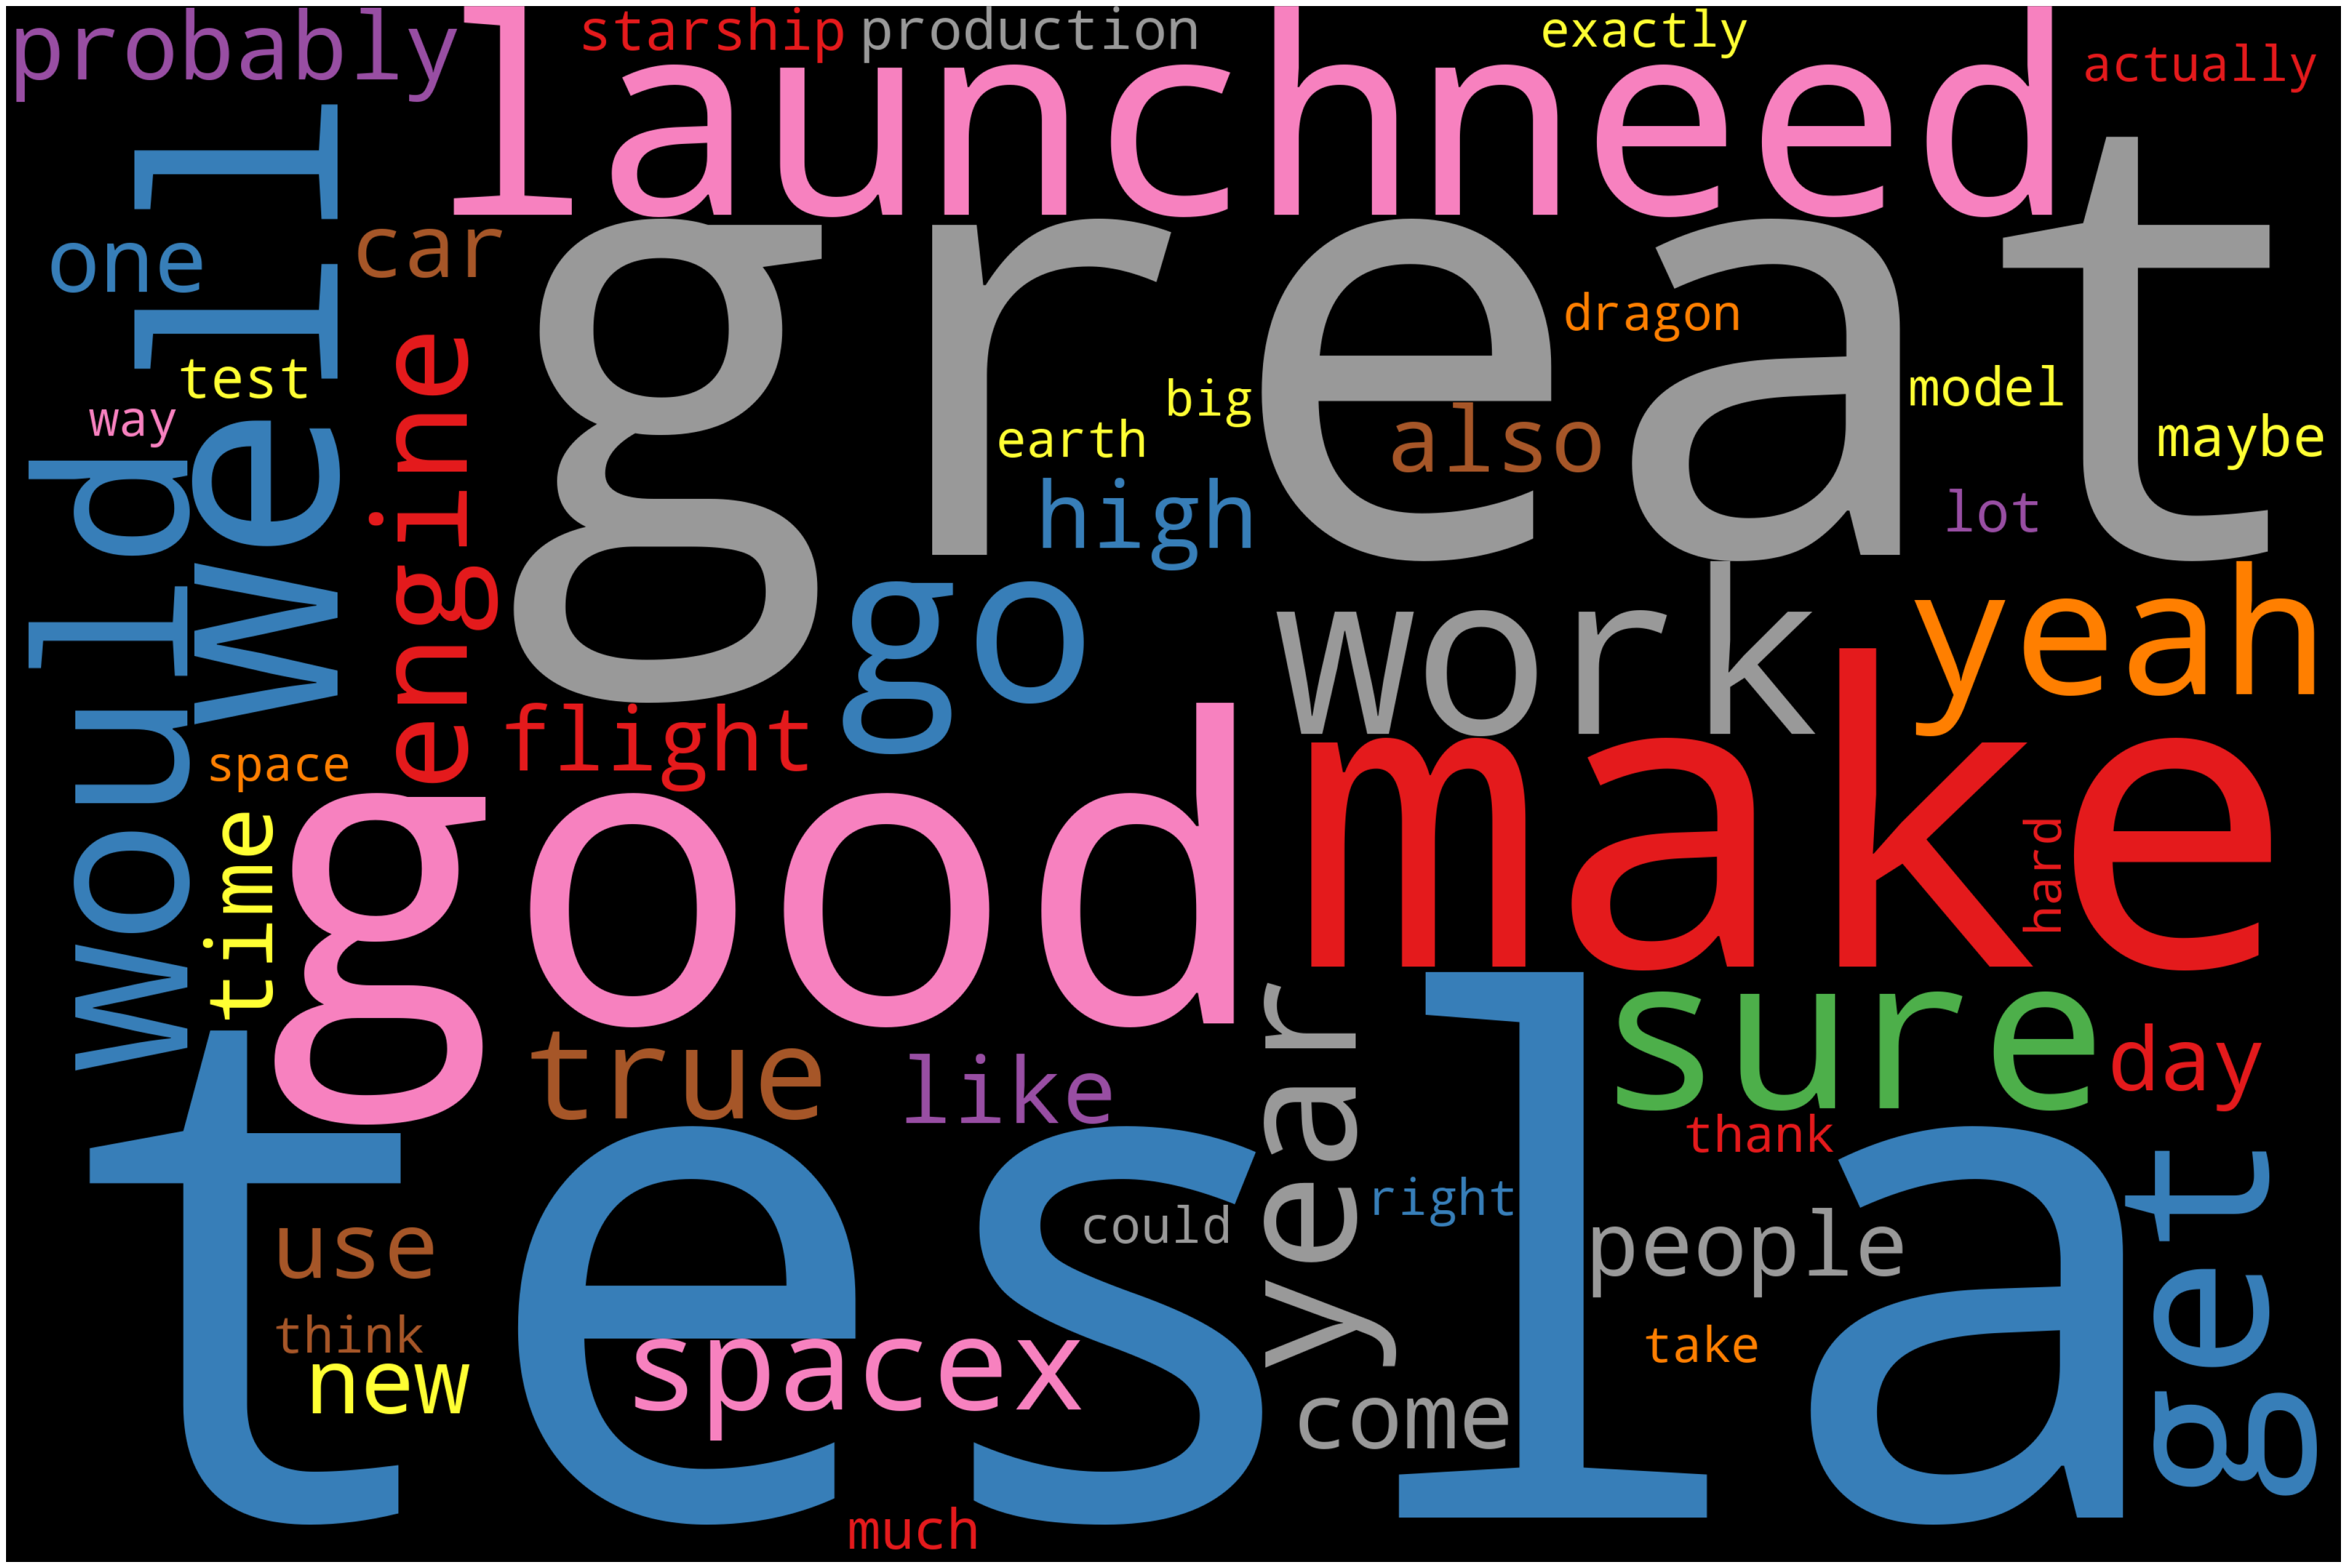

In [247]:

def plot_cloud(wordcloud):
    plt.figure(figsize=(50,40))
    plt.imshow(wordcloud)
    plt.axis('off')   
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=stop).generate(clean_tweets)
plot_cloud(wordcloud)

In [248]:
## Function to remove Patterns using regex this involves removing
## brackets,punctuations,emojis,mentions(tags),links


def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 


def clean_text(text):
    '''Make text lowercase, remove mentions, links, possessive forms, hashtags, HTML entities,
    non-alphabetic characters, and emojis.'''
    # Define regular expression patterns
    pat1 = r'@[^ ]+'                   
    pat2 = r'https?://[A-Za-z0-9./]+'  
    pat3 = r'\'s'                      
    pat4 = r'\#\w+'                     
    pat5 = r'&amp '                     
    pat6 = r'[^A-Za-z\s]'
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    
    # Combine regular expression patterns
    combined_pat = r'|'.join((pat1, pat2, pat3, pat4, pat5, pat6))
    
    # Remove matched substrings using regular expression
    text = re.sub(combined_pat, "", text)
    
    # Remove emojis
    text = emoji_pattern.sub("", text)
    
    # Convert text to lowercase and strip leading/trailing whitespace
    text = text.lower().strip()
    
    return text


In [249]:
print(clean_tweets)

I alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account u0001f923 u0001f923 this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mar

In [250]:
#Removing links,tags,empty spaces and duplicates

tweets['Clean_Tweets'] = np.vectorize(remove_pattern)(tweets['Tweets'], "@[\w]*")
cleaned_tweets = []

for index, row in tweets.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

tweets['Clean_Tweets'] = cleaned_tweets
tweets = tweets[tweets['Clean_Tweets']!='']
tweets.drop_duplicates(subset=['Clean_Tweets'], keep=False)
tweets = tweets.reset_index(drop=True)
tweets['Clean_Tweets'] = tweets['Clean_Tweets'].apply(lambda x: clean_text(x))


In [251]:
tweets['tokenized_tweets'] = tweets['Clean_Tweets'].apply(lambda x: nltk.word_tokenize(x))
tweets.head(10)


Tweets  word_count  char_count  \
0                             @kunalb11 Im an alien           4          22   
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...          13          82   
2                @joerogan @Spotify Great interview!           4          35   
3                    @gtera27 Doge is underestimated           4          31   
4  @teslacn Congratulations Tesla China for amazi...          17         104   
5  Happy New Year of the Ox! https://t.co/9WFKMYu2oj           7          49   
6  Frodo was the underdoge,\nAll thought he would...          12          96   
7     @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)           6          46   
8  @flcnhvy @anonyx10 Indeed! Tweets definitely d...          11          89   
9   The most entertaining outcome is the most likely           8          48   

   stopwords                                       Clean_Tweets  \
0          1                                        im an alien   
1          4  ray tracing on cyberpunk with hdr is nextlevel...   
2          0                                    great interview   
3          1                             doge is underestimated   
4          5  congratulations tesla china for amazing execut...   
5          2                           happy new year of the ox   
6          5  frodo was the underdoge all thought he would f...   
7          0                                        haha thanks   
8          2  indeed tweets definitely do not represent real...   
9          4   the most entertaining outcome is the most likely   

                                    tokenized_tweets  
0                                    [im, an, alien]  
1  [ray, tracing, on, cyberpunk, with, hdr, is, n...  
2                                 [great, interview]  
3                         [doge, is, underestimated]  
4  [congratulations, tesla, china, for, amazing, ...  
5                    [happy, new, year, of, the, ox]  
6  [frodo, was, the, underdoge, all, thought, he,...  
7                                     [haha, thanks]  
8  [indeed, tweets, definitely, do, not, represen...  
9  [the, most, entertaining, outcome, is, the, mo...

In [252]:
tweets.drop(['word_count','char_count','stopwords','tokenized_tweets'],axis=1,inplace=True)

In [253]:
tweets

Tweets  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1933  @flcnhvy True, it sounds so surreal, but the n...   
1934  @PPathole Make sure to read ur terms &amp; con...   
1935                @TeslaGong @PPathole Samwise Gamgee   
1936  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1937                          Progress update August 28   

                                           Clean_Tweets  
0                                           im an alien  
1     ray tracing on cyberpunk with hdr is nextlevel...  
2                                       great interview  
3                                doge is underestimated  
4     congratulations tesla china for amazing execut...  
...                                                 ...  
1933  true it sounds so surreal but the negative pro...  
1934  make sure to read ur terms amp conditions befo...  
1935                                     samwise gamgee  
1936                      altho dumb and dumber is ufuf  
1937                             progress update august  

[1938 rows x 2 columns]

In [254]:
#Removing stop words
my_stop_words=stopwords.words('english')
custom_stop_list = ['i’m','\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
my_stop_words.extend(custom_stop_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in tweets.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
tweets['absolute_Clean_Tweets'] = cleaned_tweets
tokenized_tweet = tweets['absolute_Clean_Tweets'].apply(lambda x: x.split())



In [255]:
tokenized_tweet.head(10)

0                                          [im, alien]
1     [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulations, tesla, china, amazing, execu...
5                               [happy, new, year, ox]
6             [frodo, underdoge, thought, would, fail]
7                                             [thanks]
8    [indeed, tweets, definitely, represent, realwo...
9                      [entertaining, outcome, likely]
Name: absolute_Clean_Tweets, dtype: object

In [256]:
#convertimg to Lemma and then making sentences by joining all the tokens
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head(10)

for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

tweets['absolute_Clean_Tweets'] = tokenized_tweet
tweets.head(10)


[nltk_data] Downloading package omw-1.4 to /home/gm/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Tweets  \
0                             @kunalb11 Im an alien   
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                @joerogan @Spotify Great interview!   
3                    @gtera27 Doge is underestimated   
4  @teslacn Congratulations Tesla China for amazi...   
5  Happy New Year of the Ox! https://t.co/9WFKMYu2oj   
6  Frodo was the underdoge,\nAll thought he would...   
7     @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)   
8  @flcnhvy @anonyx10 Indeed! Tweets definitely d...   
9   The most entertaining outcome is the most likely   

                                        Clean_Tweets  \
0                                        im an alien   
1  ray tracing on cyberpunk with hdr is nextlevel...   
2                                    great interview   
3                             doge is underestimated   
4  congratulations tesla china for amazing execut...   
5                           happy new year of the ox   
6  frodo was the underdoge all thought he would f...   
7                                        haha thanks   
8  indeed tweets definitely do not represent real...   
9   the most entertaining outcome is the most likely   

                               absolute_Clean_Tweets  
0                                           im alien  
1          ray tracing cyberpunk hdr nextlevel tried  
2                                    great interview  
3                                doge underestimated  
4  congratulation tesla china amazing execution l...  
5                                  happy new year ox  
6                 frodo underdoge thought would fail  
7                                             thanks  
8  indeed tweet definitely represent realworld ti...  
9                        entertaining outcome likely

In [259]:
## Bag of words 

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)
print(cv.get_feature_names_out()[100:200])

['74' '78' '7th' '90' '9007' '922' '948' '95' '99' 'aber' 'able' 'abo'
 'aboard' 'abort' 'about' 'above' 'absence' 'absolute' 'absolutely'
 'absorb' 'absorption' 'absurd' 'absurdly' 'ac' 'academia' 'accel'
 'accelera' 'accelerate' 'acceleration' 'accelerator' 'accept'
 'acceptable' 'access' 'accessible' 'accident' 'accidental' 'accommodate'
 'account' 'accura' 'accuracy' 'accurate' 'ace' 'achieve' 'achievement'
 'achy' 'acquisition' 'across' 'action' 'active' 'activity' 'actual'
 'actuall' 'actually' 'actuary' 'adagio' 'add' 'additive' 'address'
 'administer' 'adult' 'advanc' 'advance' 'advanced' 'advantage'
 'adventure' 'advertise' 'advice' 'advise' 'aero' 'afb' 'affair' 'affect'
 'affordable' 'africa' 'after' 'afternoon' 'age' 'ago' 'agony' 'agree'
 'ah' 'ahead' 'ahem' 'ai' 'aim' 'air' 'aircraft' 'airplane' 'ak' 'aka'
 'alert' 'alexander' 'algo' 'algorithm' 'alien' 'aliens' 'align' 'all'
 'allocati' 'allocation']


In [260]:
#Now we will use N Grams which becomes more complex


from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in range(0, len(tweets)):
    review = re.sub('[^a-zA-Z]', ' ', tweets['absolute_Clean_Tweets'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)



In [262]:
corpus[2],corpus[1]

('great interview', 'ray trace cyberpunk hdr nextlevel tri')

In [264]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
X.shape



(1938, 5000)

In [266]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

aber  abl  abort  absolut  absurd  acceler  accept  access  accur  \
0        0    0      0        0       0        0       0       0      0   
1        0    0      0        0       0        0       0       0      0   
2        0    0      0        0       0        0       0       0      0   
3        0    0      0        0       0        0       0       0      0   
4        0    0      0        0       0        0       0       0      0   
...    ...  ...    ...      ...     ...      ...     ...     ...    ...   
1933     0    0      0        0       0        0       0       0      0   
1934     0    0      0        0       0        0       1       0      0   
1935     0    0      0        0       0        0       0       0      0   
1936     0    0      0        0       0        0       0       0      0   
1937     0    0      0        0       0        0       0       0      0   

      achiev  ...  youd  your  your ok  your welcom  youv  yup  zero  \
0          0  ...     0     0        0            0     0    0     0   
1          0  ...     0     0        0            0     0    0     0   
2          0  ...     0     0        0            0     0    0     0   
3          0  ...     0     0        0            0     0    0     0   
4          0  ...     0     0        0            0     0    0     0   
...      ...  ...   ...   ...      ...          ...   ...  ...   ...   
1933       0  ...     0     0        0            0     0    0     0   
1934       0  ...     0     0        0            0     0    0     0   
1935       0  ...     0     0        0            0     0    0     0   
1936       0  ...     0     0        0            0     0    0     0   
1937       0  ...     0     0        0            0     0    0     0   

      zero death  zero death oct  zone  
0              0               0     0  
1              0               0     0  
2              0               0     0  
3              0               0     0  
4              0               0     0  
...          ...             ...   ...  
1933           0               0     0  
1934           0               0     0  
1935           0               0     0  
1936           0               0     0  
1937           0               0     0  

[1938 rows x 5000 columns]

### TF-IDF Vectorizer

In [267]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in range(0, len(tweets)):
    review = re.sub('[^a-zA-Z]', ' ', tweets['absolute_Clean_Tweets'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [268]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [270]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

aber  abl  abort  absolut  absurd  acceler    accept  access  accur  \
0      0.0  0.0    0.0      0.0     0.0      0.0  0.000000     0.0    0.0   
1      0.0  0.0    0.0      0.0     0.0      0.0  0.000000     0.0    0.0   
2      0.0  0.0    0.0      0.0     0.0      0.0  0.000000     0.0    0.0   
3      0.0  0.0    0.0      0.0     0.0      0.0  0.000000     0.0    0.0   
4      0.0  0.0    0.0      0.0     0.0      0.0  0.000000     0.0    0.0   
...    ...  ...    ...      ...     ...      ...       ...     ...    ...   
1933   0.0  0.0    0.0      0.0     0.0      0.0  0.000000     0.0    0.0   
1934   0.0  0.0    0.0      0.0     0.0      0.0  0.341156     0.0    0.0   
1935   0.0  0.0    0.0      0.0     0.0      0.0  0.000000     0.0    0.0   
1936   0.0  0.0    0.0      0.0     0.0      0.0  0.000000     0.0    0.0   
1937   0.0  0.0    0.0      0.0     0.0      0.0  0.000000     0.0    0.0   

      achiev  ...  youd  your  your ok  your welcom  youv  yup  zero  \
0        0.0  ...   0.0   0.0      0.0          0.0   0.0  0.0   0.0   
1        0.0  ...   0.0   0.0      0.0          0.0   0.0  0.0   0.0   
2        0.0  ...   0.0   0.0      0.0          0.0   0.0  0.0   0.0   
3        0.0  ...   0.0   0.0      0.0          0.0   0.0  0.0   0.0   
4        0.0  ...   0.0   0.0      0.0          0.0   0.0  0.0   0.0   
...      ...  ...   ...   ...      ...          ...   ...  ...   ...   
1933     0.0  ...   0.0   0.0      0.0          0.0   0.0  0.0   0.0   
1934     0.0  ...   0.0   0.0      0.0          0.0   0.0  0.0   0.0   
1935     0.0  ...   0.0   0.0      0.0          0.0   0.0  0.0   0.0   
1936     0.0  ...   0.0   0.0      0.0          0.0   0.0  0.0   0.0   
1937     0.0  ...   0.0   0.0      0.0          0.0   0.0  0.0   0.0   

      zero death  zero death oct  zone  
0            0.0             0.0   0.0  
1            0.0             0.0   0.0  
2            0.0             0.0   0.0  
3            0.0             0.0   0.0  
4            0.0             0.0   0.0  
...          ...             ...   ...  
1933         0.0             0.0   0.0  
1934         0.0             0.0   0.0  
1935         0.0             0.0   0.0  
1936         0.0             0.0   0.0  
1937         0.0             0.0   0.0  

[1938 rows x 5000 columns]

### Named Entity Recognition(NER)

In [271]:


# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)



### Filtering out only the nouns and verbs from the Text to Tokens

In [273]:
# Filtering the nouns and verbs only
one_block=clean_tweets
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]


# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # Top 10 results


word  count
0   tesla     77
1    make     64
2  launch     62
3    year     49
4    work     49
5    need     47
6      go     45
7    come     42
8     day     38
9     get     37

<Axes: title={'center': 'Top 10 nouns and verbs in the data'}, xlabel='word'>

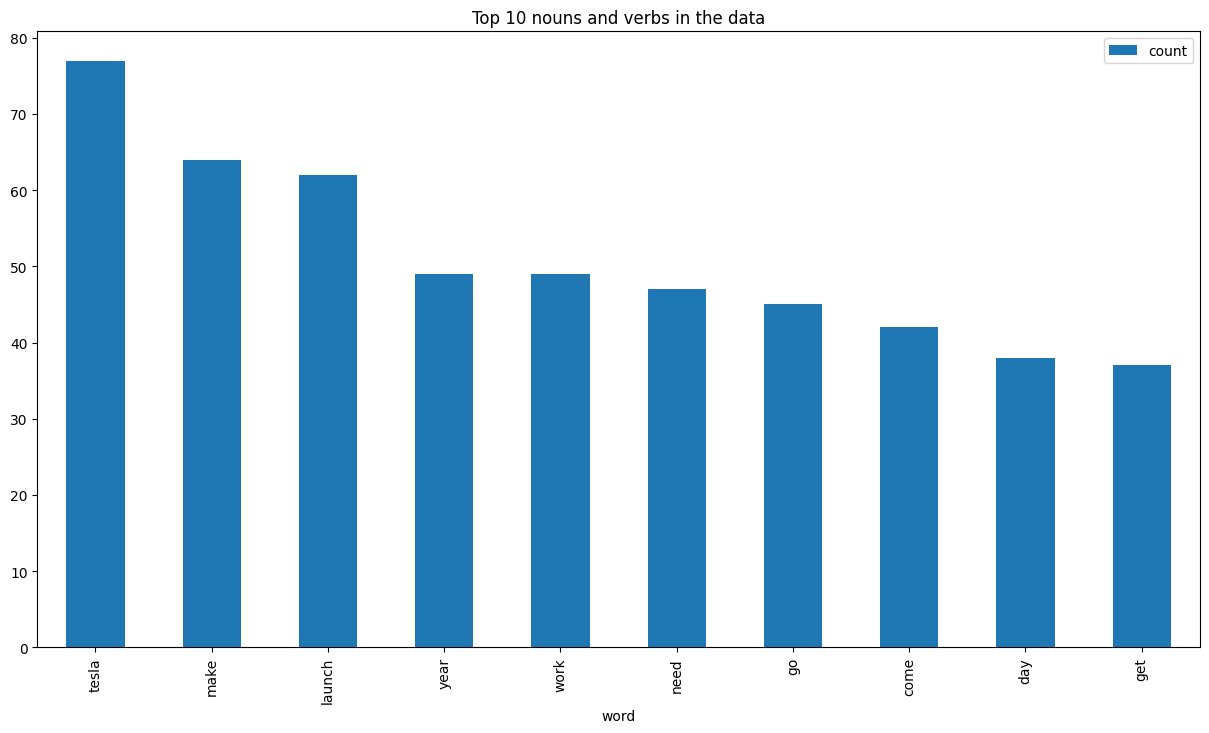

In [276]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(15,8),title='Top 10 nouns and verbs in the data')

### Feature Extraction

In [293]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(tweets['absolute_Clean_Tweets'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(tweets['absolute_Clean_Tweets'])


### There are 2 ways to fetch sentiment-
1) NLTK 
2)TextBlob

In [277]:

def fetch_sentiment_using_SIA(text):#Using NLTK
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

def fetch_sentiment_using_textblob(text):#Using TextBlob
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'


In [279]:
sentiments_using_SIA = tweets.absolute_Clean_Tweets.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

sid = SentimentIntensityAnalyzer()
sid.polarity_scores(tweets.absolute_Clean_Tweets[3])
df=pd.DataFrame()
df['Tweets'] = tweets.absolute_Clean_Tweets
df['scores'] = tweets['Clean_Tweets'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05 else 'Neutral'))


In [280]:
df

Tweets  \
0                                              im alien   
1             ray tracing cyberpunk hdr nextlevel tried   
2                                       great interview   
3                                   doge underestimated   
4     congratulation tesla china amazing execution l...   
...                                                 ...   
1933  true sound surreal negative propaganda still a...   
1934  make sure read ur term amp condition clicking ...   
1935                                     samwise gamgee   
1936                             altho dumb dumber ufuf   
1937                             progress update august   

                                                 scores  compound sentiment  
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
2     {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...    0.6249  Positive  
3     {'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...   -0.2732  Negative  
4     {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...    0.8271  Positive  
...                                                 ...       ...       ...  
1933  {'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...   -0.4215  Negative  
1934  {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...    0.5994  Positive  
1935  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
1936  {'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'comp...   -0.7003  Negative  
1937  {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...    0.4215  Positive  

[1938 rows x 4 columns]

In [281]:
temp = df.groupby('sentiment').count()['Tweets'].reset_index().sort_values(by='Tweets',ascending=False)
temp.style.background_gradient(cmap='rainbow')


<Axes: xlabel='sentiment', ylabel='count'>

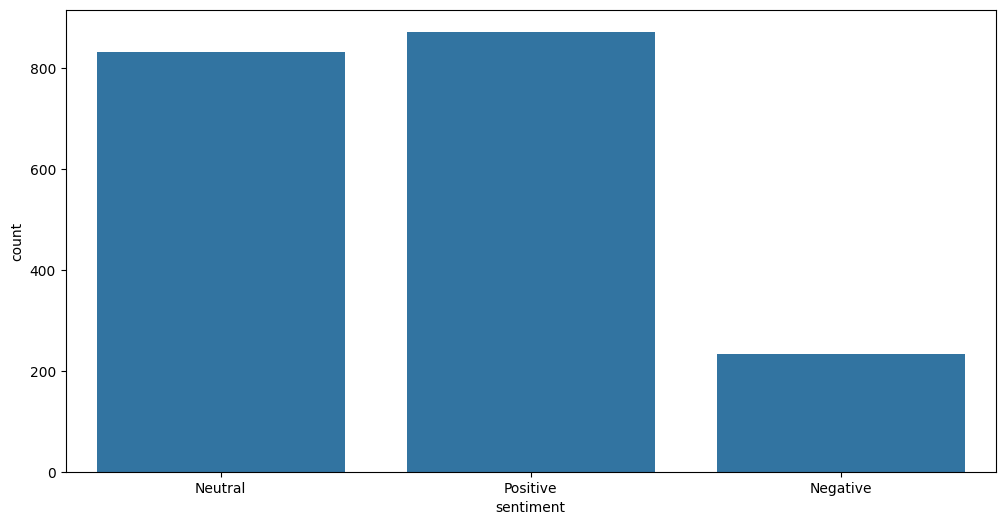

In [282]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

/tmp/ipykernel_11991/3502267246.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['compound'])


<Axes: xlabel='compound', ylabel='Density'>

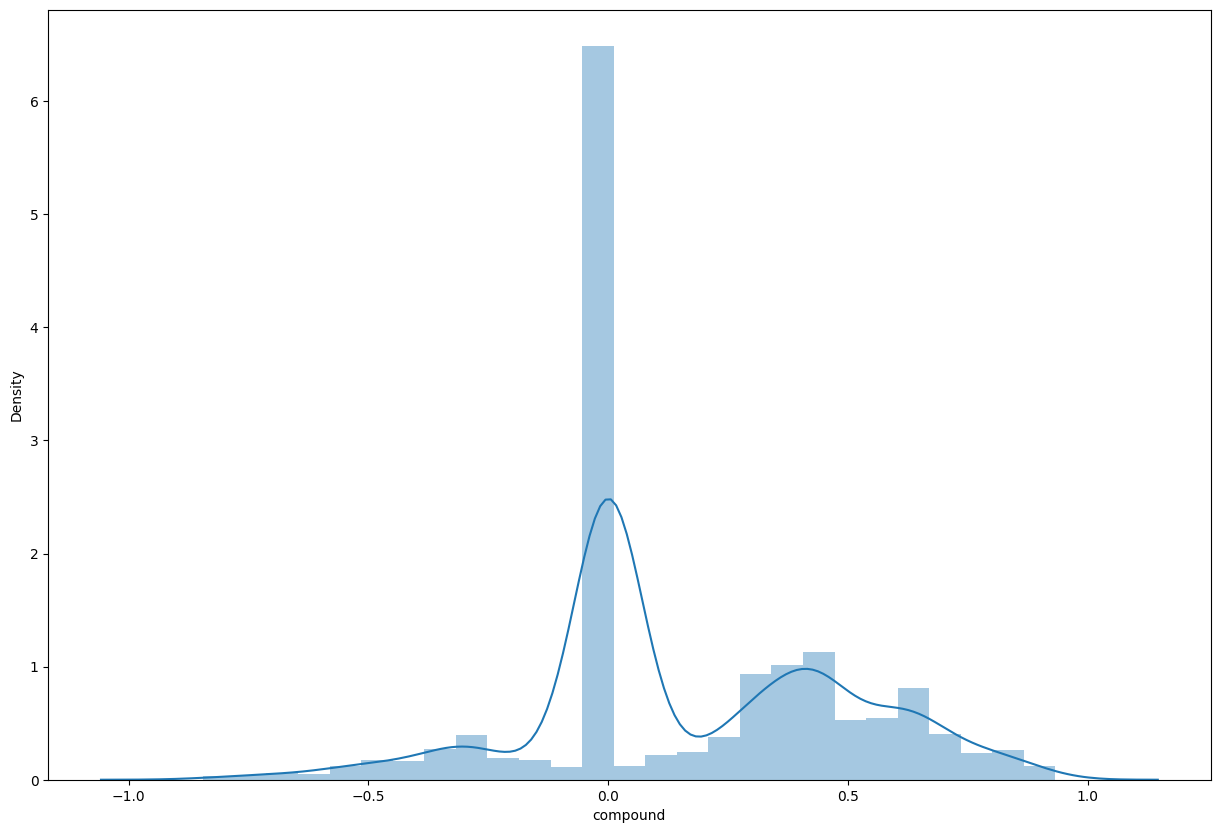

In [283]:
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

### Using Text Blob

In [285]:
sentiments_using_textblob = tweets.absolute_Clean_Tweets.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

count
absolute_Clean_Tweets       
pos                     1740
neg                      198

In [286]:
tweets['sentiment'] = sentiments_using_SIA
tweets.head()


Tweets  \
0                             @kunalb11 Im an alien   
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                @joerogan @Spotify Great interview!   
3                    @gtera27 Doge is underestimated   
4  @teslacn Congratulations Tesla China for amazi...   

                                        Clean_Tweets  \
0                                        im an alien   
1  ray tracing on cyberpunk with hdr is nextlevel...   
2                                    great interview   
3                             doge is underestimated   
4  congratulations tesla china for amazing execut...   

                               absolute_Clean_Tweets sentiment  
0                                           im alien       pos  
1          ray tracing cyberpunk hdr nextlevel tried       pos  
2                                    great interview       pos  
3                                doge underestimated       neg  
4  congratulation tesla china amazing execution l...       pos

### Most commonly Used Good and Bad words in Tweets


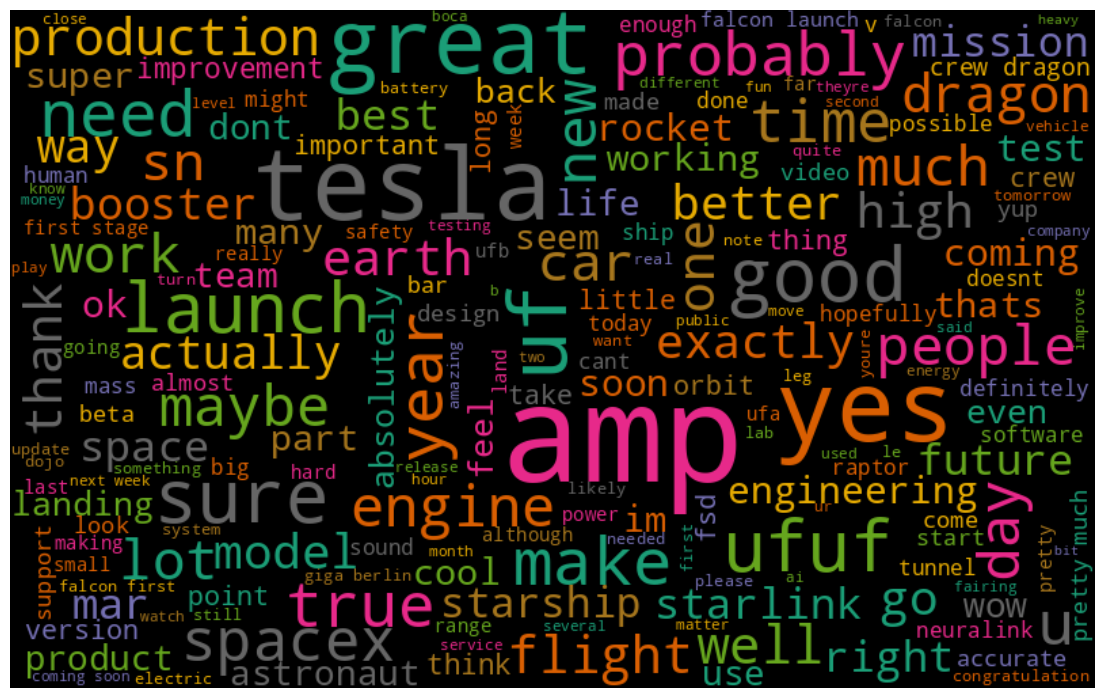

In [287]:


def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


#Positive Sentiment
all_words = ' '.join([text for text in tweets['absolute_Clean_Tweets'][tweets.sentiment == 'pos']])
generate_wordcloud(all_words)



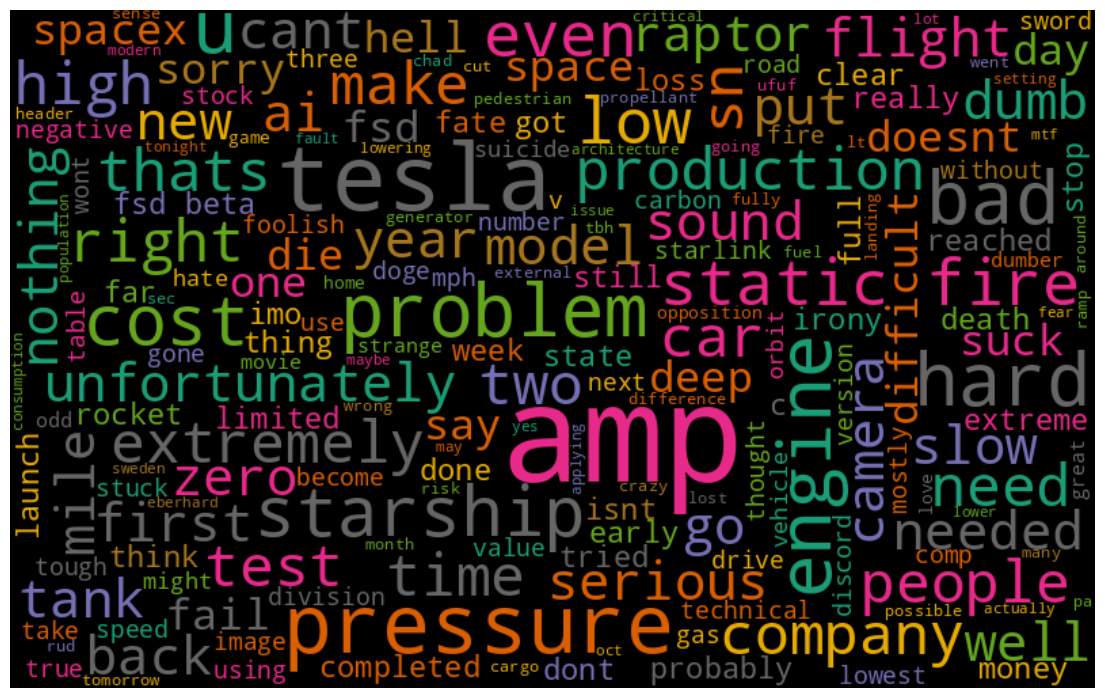

In [288]:
#Negative sentiment
all_words = ' '.join([text for text in tweets['absolute_Clean_Tweets'][tweets.sentiment == 'neg']])
generate_wordcloud(all_words)

### Model Building

In [290]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer 

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

In [291]:
target_variable = tweets['sentiment'].apply(lambda x: 0 if x=='neg' else 1)



In [292]:
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()



def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)



## Prediction

### BOW word Feature

Accuracy Score - 0.6958762886597938


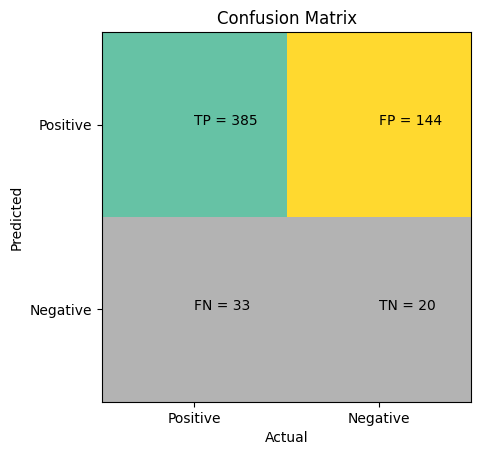

In [294]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)


### TF-IDF

Accuracy Score - 0.6907216494845361


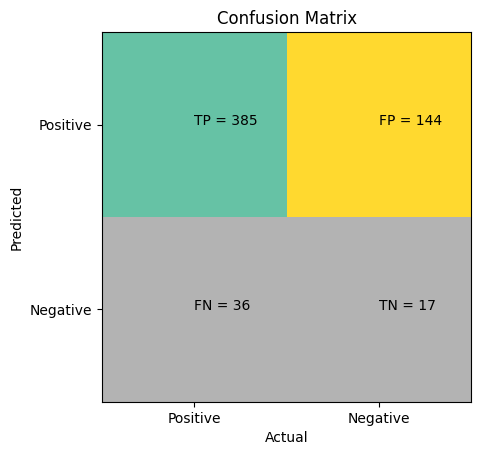

In [295]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)


Now we can use SKlearn Pipeline to do Logistic regression

In [297]:
from sklearn.linear_model import LogisticRegression
tweets['sentiment_binary'] = tweets['sentiment'].apply(lambda x: 0 if x=='neg' else 1)
pipeline_ls = make_pipeline(CountVectorizer(max_df=0.90, min_df=2, tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
X_train, X_test, y_train, y_test = train_test_split(tweets.absolute_Clean_Tweets, tweets.sentiment_binary)
pipeline_ls.fit(X_train, y_train)


/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.9, min_df=2, stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [298]:
pipeline_ls.score(X_test,y_test) 


0.9010309278350516